In [16]:
# import dependencies
import pandas as pd
import pprint
import psycopg2
import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
# SQLAlchemyfrom sqlalchemy import create_engine
from sqlalchemy import create_engine
engine = create_engine('postgresql+psycopg2://postgres:@localhost:5432/sql-challenge')
connection = engine.connect()


In [30]:

employees = pd.read_sql('select * from employees', connection, parse_dates=['birth_date','hire_date'])
employees.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [35]:
dept_manager = pd.read_sql('select * from dept_manager', connection)
dept_manager.head()

,dept_no,emp_no
0,d001,110022
1,d001,110039
2,d002,110085
3,d002,110114
4,d003,110183


In [42]:
salaries = pd.read_sql('select * from salaries', connection)
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [41]:
titles = pd.read_sql('select * from titles', connection)
titles.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [44]:
#change the column name "title_id" to match the employee column "emp_title_id"
titles.rename(columns ={'title_id':'emp_title_id',
                       'title':'title'},
             inplace = True)

In [45]:
# merge salaries with employee 
employee_salaries = employees.merge(salaries, on='emp_no')
employee_salaries.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [48]:
# merge employee_salaries with the title df
employee_title = employee_salaries.merge(titles, on='emp_title_id')
employee_title

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff
...,...,...,...,...,...,...,...,...,...
300019,111400,m0001,1959-11-09,Arie,Staelin,M,1985-01-01,72446,Manager
300020,111133,m0001,1955-03-16,Hauke,Zhang,M,1986-12-30,71148,Manager
300021,110085,m0001,1959-10-28,Ebru,Alpin,M,1985-01-01,60026,Manager
300022,110386,m0001,1953-10-04,Shem,Kieras,M,1988-10-14,40000,Manager


In [54]:
# create a dataframe of "emp_no", "title", "salary"
employee_df = employee_title[['emp_no','title','salary']]
employee_df

,emp_no,title,salary
0,473302,Staff,40000
1,421786,Staff,40000
2,273487,Staff,56087
3,246449,Staff,87084
4,48085,Staff,63016
...,...,...,...
300019,111400,Manager,72446
300020,111133,Manager,71148
300021,110085,Manager,60026
300022,110386,Manager,40000


In [113]:
# group by title and show the first instances
employee_group =employee_title.groupby('title')
employee_group.first()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
title,,,,,,,,
Assistant Engineer,252000,e0001,1952-12-03,Zhonghui,Gyimothy,F,1989-03-02,40000
Engineer,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
Manager,111877,m0001,1962-10-18,Xiaobin,Spinelli,F,1991-08-17,53846
Senior Engineer,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000
Senior Staff,461591,s0002,1964-11-17,Xudong,Samarati,M,1985-11-13,40000
Staff,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
Technique Leader,17934,e0004,1963-07-12,Bilhanan,Wuwongse,M,1993-10-06,48795


In [114]:
# create a variable for just salary and calculate the average salary of each title
group = employee_group[['salary']].mean().round(2)
group

,salary
title,
Assistant Engineer,48564.43
Engineer,48535.34
Manager,51531.04
Senior Engineer,48506.80
Senior Staff,58550.17
Staff,58465.38
Technique Leader,48582.90


Text(0.5, 1.0, 'Bar Chart of Average Salary by Title')

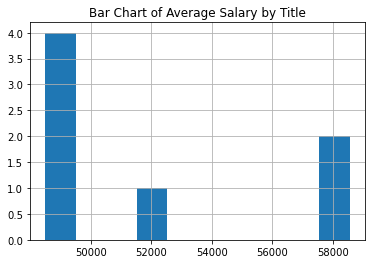

In [120]:
group.hist(column='salary')

# set a title for the chart
plt.title ("Bar Chart of Average Salary by Title")

Text(0.5, 1.0, 'Bar Chart of Average Salary by Title')

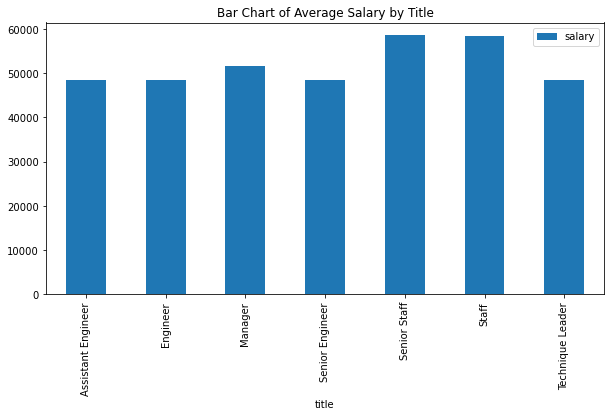

In [118]:
# plot a bar chart using pandas
group.plot(kind='bar',figsize=(10,5))

# set a title for the chart
plt.title ("Bar Chart of Average Salary by Title")

In [ ]:
plt.bar